In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [137]:
demar = pd.read_csv("DemarDerozan.csv")
kyle = pd.read_csv("KyleLowry.csv")
anunoby = pd.read_csv("OGAnunoby.csv")
serge_ibaka = pd.read_csv("SergeIbaka.csv")
valanciunas = pd.read_csv("Valanciunas.csv")
pascal_siakam = pd.read_csv("PascalSiakam.csv")
jakob_poltl = pd.read_csv("Jakob _Pöltl .csv")
fred_vanvleet = pd.read_csv("Fred_vanvleet.csv")
delon_wright = pd.read_csv("DelonWright.csv")
cj_miles = pd.read_csv("CJMiles.csv")
norman_powell = pd.read_csv("NormanPowell.csv")
lucas_nogueira = pd.read_csv("LucasNogueira.csv")
lorenzo_brown = pd.read_csv("LorenzoBrown.csv")
malcolm_miller = pd.read_csv("MalcolmMiller.csv")
malachi_richardson = pd.read_csv("MalachiRichardson.csv")
alfonzo_mckinnie = pd.read_csv("AlfonzoMcKinnie.csv")
bruno_cabaclo = pd.read_csv("BrunoCabaclo.csv")
nigel_hayes = pd.read_csv("NigelHayes.csv")

In [138]:
demar[['Date','3P']]

,Date,3P
0,2017-10-19,0.0
1,2017-10-21,0.0
2,2017-10-23,2.0
3,2017-10-25,0.0
4,2017-10-27,0.0
...,...,...
87,2018-04-27,0.0
88,2018-05-01,0.0
89,2018-05-03,0.0
90,2018-05-05,0.0


In [139]:
demar.columns

Index(['Rk', 'G', 'Date', 'Age', 'Tm', 'Unnamed: 5', 'Opp', 'Unnamed: 7', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')

In [140]:
demar_df = demar.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
demar_df['Date'] = pd.to_datetime(demar_df["Date"], format="%Y-%m-%d")
demar_df.dtypes

Rk                     int64
G                    float64
Date          datetime64[ns]
Age                    int64
Unnamed: 5            object
Opp                   object
Unnamed: 7            object
GS                    object
3P                   float64
3PA                  float64
3P%                  float64
dtype: object

In [141]:
demar_df['Date2'] = demar_df['Date'].shift(+1)
demar_df['Time Rested'] = (demar_df['Date'] - demar_df['Date2']).dt.days
demar_df = demar_df.drop(columns=['Date2'])
demar_df = demar_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})
demar_df['Home vs Away'].fillna("Home",inplace=True)
demar_df['Time Rested'].fillna("N/A", inplace = True)

demar_df= demar_df.replace(to_replace = "@", value = "Away")
demar_df['Name'] = "Demar Derozan"
demar_df



,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,28,Home,CHI,W (+17),1,0.0,0.0,NaN,N/A,Demar Derozan
1,2,2.0,2017-10-21,28,Home,PHI,W (+34),1,0.0,1.0,0.0,2,Demar Derozan
2,3,3.0,2017-10-23,28,Away,SAS,L (-4),1,2.0,5.0,0.4,2,Demar Derozan
3,4,4.0,2017-10-25,28,Away,GSW,L (-5),1,0.0,0.0,NaN,2,Demar Derozan
4,5,5.0,2017-10-27,28,Away,LAL,W (+9),1,0.0,2.0,0.0,2,Demar Derozan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,28,Away,WAS,W (+10),1,0.0,4.0,0.0,2,Demar Derozan
88,7,7.0,2018-05-01,28,Home,CLE,L (-1),1,0.0,4.0,0.0,4,Demar Derozan
89,8,8.0,2018-05-03,28,Home,CLE,L (-18),1,0.0,5.0,0.0,2,Demar Derozan
90,9,9.0,2018-05-05,28,Away,CLE,L (-2),1,0.0,0.0,NaN,2,Demar Derozan


In [142]:
# remove the columns we don't need 
kyle_df = kyle.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])

# change datatype of the Dates to datetime
kyle_df['Date'] = pd.to_datetime(kyle_df['Date'], format = "%Y-%m-%d")

# calculate the number of days in between game days
kyle_df['Date2'] = kyle_df['Date'].shift(+1)
kyle_df['Time Rested'] = (kyle_df['Date'] - kyle_df['Date2']).dt.days
kyle_df = kyle_df.drop(columns=['Date2'])


# rename the unnamed columns for better clarification
kyle_df = kyle_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
kyle_df['Home vs Away'].fillna("Home",inplace=True)
kyle_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
kyle_df= kyle_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
kyle_df['Name'] = "Kyle Lowry"
kyle_df


,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,31,Home,CHI,W (+17),1,1.0,3.0,0.333,N/A,Kyle Lowry
1,2,2.0,2017-10-21,31,Home,PHI,W (+34),1,4.0,10.0,0.400,2,Kyle Lowry
2,3,3.0,2017-10-23,31,Away,SAS,L (-4),1,2.0,8.0,0.250,2,Kyle Lowry
3,4,4.0,2017-10-25,31,Away,GSW,L (-5),1,1.0,8.0,0.125,2,Kyle Lowry
4,5,5.0,2017-10-27,31,Away,LAL,W (+9),1,3.0,7.0,0.429,2,Kyle Lowry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,32,Away,WAS,W (+10),1,3.0,7.0,0.429,2,Kyle Lowry
88,7,7.0,2018-05-01,32,Home,CLE,L (-1),1,3.0,6.0,0.500,4,Kyle Lowry
89,8,8.0,2018-05-03,32,Home,CLE,L (-18),1,3.0,6.0,0.500,2,Kyle Lowry
90,9,9.0,2018-05-05,32,Away,CLE,L (-2),1,4.0,8.0,0.500,2,Kyle Lowry


In [143]:
test6 = anunoby.copy()
test6.loc[test6['Tm'] == "TOR", :]


,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2017-10-19,20,TOR,NaN,CHI,W (+17),0,17:14,...,1.0,3.0,2.0,0.0,0.0,0.0,1.0,9.0,8.7,26.0
1,2,2.0,2017-10-21,20,TOR,NaN,PHI,W (+34),0,15:15,...,3.0,3.0,2.0,1.0,0.0,0.0,3.0,3.0,3.4,4.0
2,3,3.0,2017-10-23,20,TOR,@,SAS,L (-4),0,14:42,...,1.0,1.0,1.0,0.0,0.0,0.0,4.0,4.0,0.7,3.0
3,4,4.0,2017-10-25,20,TOR,@,GSW,L (-5),0,18:05,...,0.0,4.0,2.0,0.0,0.0,1.0,0.0,8.0,8.2,8.0
4,5,5.0,2017-10-27,20,TOR,@,LAL,W (+9),0,18:30,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,7.0,3.4,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,20,TOR,@,WAS,W (+10),1,20:05,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,5.6,3.0
88,7,7.0,2018-05-01,20,TOR,NaN,CLE,L (-1),1,30:27:00,...,1.0,2.0,2.0,0.0,0.0,0.0,3.0,7.0,5.9,4.0
89,8,8.0,2018-05-03,20,TOR,NaN,CLE,L (-18),1,23:09,...,0.0,0.0,1.0,1.0,0.0,1.0,3.0,5.0,1.8,-10.0
90,9,9.0,2018-05-05,20,TOR,@,CLE,L (-2),1,32:57:00,...,2.0,4.0,0.0,0.0,1.0,0.0,2.0,18.0,13.5,0.0


In [144]:

anunoby_df = anunoby.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
anunoby_df['Date'] = pd.to_datetime(anunoby['Date'], format = "%Y-%m-%d")
anunoby_df['Time Rested'] = kyle_df['Time Rested']


# rename the unnamed columns for better clarification
anunoby_df = anunoby_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
anunoby_df['Home vs Away'].fillna("Home",inplace=True)
anunoby_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
anunoby_df= anunoby_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
anunoby_df['Name'] = "OG Anunoby"
anunoby_df


,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,20,Home,CHI,W (+17),0,1.0,3.0,0.333,N/A,OG Anunoby
1,2,2.0,2017-10-21,20,Home,PHI,W (+34),0,1.0,2.0,0.500,2,OG Anunoby
2,3,3.0,2017-10-23,20,Away,SAS,L (-4),0,0.0,2.0,0.000,2,OG Anunoby
3,4,4.0,2017-10-25,20,Away,GSW,L (-5),0,2.0,4.0,0.500,2,OG Anunoby
4,5,5.0,2017-10-27,20,Away,LAL,W (+9),0,1.0,3.0,0.333,2,OG Anunoby
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,20,Away,WAS,W (+10),1,1.0,2.0,0.500,2,OG Anunoby
88,7,7.0,2018-05-01,20,Home,CLE,L (-1),1,1.0,3.0,0.333,4,OG Anunoby
89,8,8.0,2018-05-03,20,Home,CLE,L (-18),1,1.0,3.0,0.333,2,OG Anunoby
90,9,9.0,2018-05-05,20,Away,CLE,L (-2),1,4.0,7.0,0.571,2,OG Anunoby


In [145]:
sergeibaka_df = serge_ibaka.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
sergeibaka_df['Date'] = pd.to_datetime(sergeibaka_df['Date'], format = "%Y-%m-%d")
sergeibaka_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
sergeibaka_df = sergeibaka_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
sergeibaka_df['Home vs Away'].fillna("Home",inplace=True)
sergeibaka_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
sergeibaka_df= sergeibaka_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
sergeibaka_df['Name'] = "Serge Ibaka"
sergeibaka_df


,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,28,Home,CHI,W (+17),1,2.0,4.0,0.500,N/A,Serge Ibaka
1,2,2.0,2017-10-21,28,Home,PHI,W (+34),1,5.0,9.0,0.556,2,Serge Ibaka
2,3,3.0,2017-10-23,28,Away,SAS,L (-4),1,2.0,6.0,0.333,2,Serge Ibaka
3,4,4.0,2017-10-25,28,Away,GSW,L (-5),1,1.0,6.0,0.167,2,Serge Ibaka
4,5,5.0,2017-10-27,28,Away,LAL,W (+9),1,0.0,1.0,0.000,2,Serge Ibaka
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,28,Away,WAS,W (+10),1,1.0,3.0,0.333,2,Serge Ibaka
88,7,7.0,2018-05-01,28,Home,CLE,L (-1),1,0.0,3.0,0.000,4,Serge Ibaka
89,8,8.0,2018-05-03,28,Home,CLE,L (-18),1,0.0,1.0,0.000,2,Serge Ibaka
90,9,9.0,2018-05-05,28,Away,CLE,L (-2),0,1.0,3.0,0.333,2,Serge Ibaka


In [146]:
valanciunas_df = valanciunas.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
valanciunas_df["Date"] = pd.to_datetime(valanciunas['Date'], format = "%Y-%m-%d")
valanciunas_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
valanciunas_df = valanciunas_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
valanciunas_df['Home vs Away'].fillna("Home",inplace=True)
valanciunas_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
valanciunas_df= valanciunas_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
valanciunas_df['Name'] = "Jonas Valanciunas"
valanciunas_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,25,Home,CHI,W (+17),1,0.0,1.0,0.0,N/A,Jonas Valanciunas
1,2,2.0,2017-10-21,25,Home,PHI,W (+34),1,0.0,0.0,NaN,2,Jonas Valanciunas
2,3,NaN,2017-10-23,25,Away,SAS,L (-4),Inactive,NaN,NaN,NaN,2,Jonas Valanciunas
3,4,NaN,2017-10-25,25,Away,GSW,L (-5),Inactive,NaN,NaN,NaN,2,Jonas Valanciunas
4,5,NaN,2017-10-27,25,Away,LAL,W (+9),Inactive,NaN,NaN,NaN,2,Jonas Valanciunas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,25,Away,WAS,W (+10),1,0.0,0.0,NaN,2,Jonas Valanciunas
88,7,7.0,2018-05-01,25,Home,CLE,L (-1),1,0.0,1.0,0.0,4,Jonas Valanciunas
89,8,8.0,2018-05-03,25,Home,CLE,L (-18),1,0.0,1.0,0.0,2,Jonas Valanciunas
90,9,9.0,2018-05-05,25,Away,CLE,L (-2),1,0.0,0.0,NaN,2,Jonas Valanciunas


In [147]:
pascalsiakam_df = pascal_siakam.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
pascalsiakam_df["Date"] = pd.to_datetime(pascalsiakam_df['Date'], format = "%Y-%m-%d")
pascalsiakam_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
pascalsiakam_df = pascalsiakam_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
pascalsiakam_df['Home vs Away'].fillna("Home",inplace=True)
pascalsiakam_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
pascalsiakam_df= pascalsiakam_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
pascalsiakam_df['Name'] = "Pascal Siakam"
pascalsiakam_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,23,Home,CHI,W (+17),0,0.0,0.0,NaN,N/A,Pascal Siakam
1,2,2.0,2017-10-21,23,Home,PHI,W (+34),0,0.0,2.0,0.000,2,Pascal Siakam
2,3,NaN,2017-10-23,23,Away,SAS,L (-4),Did Not Play,NaN,NaN,NaN,2,Pascal Siakam
3,4,3.0,2017-10-25,23,Away,GSW,L (-5),1,2.0,3.0,0.667,2,Pascal Siakam
4,5,4.0,2017-10-27,23,Away,LAL,W (+9),1,1.0,3.0,0.333,2,Pascal Siakam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,24,Away,WAS,W (+10),0,0.0,0.0,NaN,2,Pascal Siakam
88,7,7.0,2018-05-01,24,Home,CLE,L (-1),0,1.0,1.0,1.000,4,Pascal Siakam
89,8,8.0,2018-05-03,24,Home,CLE,L (-18),0,0.0,0.0,NaN,2,Pascal Siakam
90,9,9.0,2018-05-05,24,Away,CLE,L (-2),0,0.0,0.0,NaN,2,Pascal Siakam


In [148]:
jakob_poltl_df = jakob_poltl.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
jakob_poltl_df['Date'] = pd.to_datetime(jakob_poltl_df['Date'], format = "%Y-%m-%d")
jakob_poltl_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
jakob_poltl_df = jakob_poltl_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
jakob_poltl_df['Home vs Away'].fillna("Home",inplace=True)
jakob_poltl_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
jakob_poltl_df= jakob_poltl_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
jakob_poltl_df['Name'] = "Jakob Poltl"
jakob_poltl_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,22,Home,CHI,W (+17),0,0.0,0.0,NaN,N/A,Jakob Poltl
1,2,2.0,2017-10-21,22,Home,PHI,W (+34),0,0.0,0.0,NaN,2,Jakob Poltl
2,3,3.0,2017-10-23,22,Away,SAS,L (-4),0,0.0,0.0,NaN,2,Jakob Poltl
3,4,4.0,2017-10-25,22,Away,GSW,L (-5),0,0.0,0.0,NaN,2,Jakob Poltl
4,5,5.0,2017-10-27,22,Away,LAL,W (+9),0,0.0,0.0,NaN,2,Jakob Poltl
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,22,Away,WAS,W (+10),0,0.0,1.0,0.0,2,Jakob Poltl
88,7,7.0,2018-05-01,22,Home,CLE,L (-1),0,0.0,0.0,NaN,4,Jakob Poltl
89,8,8.0,2018-05-03,22,Home,CLE,L (-18),0,0.0,0.0,NaN,2,Jakob Poltl
90,9,NaN,2018-05-05,22,Away,CLE,L (-2),Did Not Play,NaN,NaN,NaN,2,Jakob Poltl


In [149]:
fred_vanvleet_df = fred_vanvleet.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
fred_vanvleet_df['Date'] = pd.to_datetime(fred_vanvleet_df['Date'], format = "%Y-%m-%d")
fred_vanvleet_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
fred_vanvleet_df = fred_vanvleet_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
fred_vanvleet_df['Home vs Away'].fillna("Home",inplace=True)
fred_vanvleet_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
fred_vanvleet_df= fred_vanvleet_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
fred_vanvleet_df['Name'] = "Fred Vanvleet"
fred_vanvleet_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,23,Home,CHI,W (+17),0,0.0,2.0,0.000,N/A,Fred Vanvleet
1,2,2.0,2017-10-21,23,Home,PHI,W (+34),0,1.0,4.0,0.250,2,Fred Vanvleet
2,3,3.0,2017-10-23,23,Away,SAS,L (-4),0,1.0,2.0,0.500,2,Fred Vanvleet
3,4,4.0,2017-10-25,23,Away,GSW,L (-5),0,0.0,0.0,NaN,2,Fred Vanvleet
4,5,5.0,2017-10-27,23,Away,LAL,W (+9),0,0.0,1.0,0.000,2,Fred Vanvleet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,2.0,2018-04-27,24,Away,WAS,W (+10),0,1.0,5.0,0.200,2,Fred Vanvleet
88,7,3.0,2018-05-01,24,Home,CLE,L (-1),0,1.0,5.0,0.200,4,Fred Vanvleet
89,8,4.0,2018-05-03,24,Home,CLE,L (-18),0,4.0,7.0,0.571,2,Fred Vanvleet
90,9,5.0,2018-05-05,24,Away,CLE,L (-2),1,1.0,7.0,0.143,2,Fred Vanvleet


In [150]:
delon_wright_df = delon_wright.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
delon_wright_df['Date'] = pd.to_datetime(delon_wright_df['Date'], format = "%Y-%m-%d")
delon_wright_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
delon_wright_df = delon_wright_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
delon_wright_df['Home vs Away'].fillna("Home",inplace=True)
delon_wright_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
delon_wright_df= delon_wright_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
delon_wright_df['Name'] = "Delon Wright"
delon_wright_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,25,Home,CHI,W (+17),0,0.0,1.0,0.000,N/A,Delon Wright
1,2,2.0,2017-10-21,25,Home,PHI,W (+34),0,1.0,6.0,0.167,2,Delon Wright
2,3,3.0,2017-10-23,25,Away,SAS,L (-4),0,0.0,3.0,0.000,2,Delon Wright
3,4,4.0,2017-10-25,25,Away,GSW,L (-5),0,0.0,4.0,0.000,2,Delon Wright
4,5,5.0,2017-10-27,25,Away,LAL,W (+9),0,0.0,2.0,0.000,2,Delon Wright
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,26,Away,WAS,W (+10),0,0.0,0.0,NaN,2,Delon Wright
88,7,7.0,2018-05-01,26,Home,CLE,L (-1),0,1.0,2.0,0.500,4,Delon Wright
89,8,8.0,2018-05-03,26,Home,CLE,L (-18),0,1.0,2.0,0.500,2,Delon Wright
90,9,9.0,2018-05-05,26,Away,CLE,L (-2),0,0.0,1.0,0.000,2,Delon Wright


In [151]:
cj_miles_df = cj_miles.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
cj_miles_df['Date'] = pd.to_datetime(cj_miles_df['Date'], format = "%Y-%m-%d")
cj_miles_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
cj_miles_df = cj_miles_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
cj_miles_df['Home vs Away'].fillna("Home",inplace=True)
cj_miles_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
cj_miles_df= cj_miles_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
cj_miles_df['Name'] = "CJ Miles"
cj_miles_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,30,Home,CHI,W (+17),0,6.0,9.0,0.667,N/A,CJ Miles
1,2,2.0,2017-10-21,30,Home,PHI,W (+34),0,1.0,6.0,0.167,2,CJ Miles
2,3,3.0,2017-10-23,30,Away,SAS,L (-4),0,3.0,7.0,0.429,2,CJ Miles
3,4,4.0,2017-10-25,30,Away,GSW,L (-5),0,2.0,8.0,0.250,2,CJ Miles
4,5,5.0,2017-10-27,30,Away,LAL,W (+9),0,2.0,7.0,0.286,2,CJ Miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,31,Away,WAS,W (+10),0,1.0,3.0,0.333,2,CJ Miles
88,7,7.0,2018-05-01,31,Home,CLE,L (-1),0,2.0,3.0,0.667,4,CJ Miles
89,8,8.0,2018-05-03,31,Home,CLE,L (-18),0,2.0,2.0,1.000,2,CJ Miles
90,9,9.0,2018-05-05,31,Away,CLE,L (-2),0,3.0,7.0,0.429,2,CJ Miles


In [152]:
norman_powell_df= norman_powell.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
norman_powell_df['Date'] = pd.to_datetime(norman_powell_df['Date'], format = "%Y-%m-%d")
norman_powell_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
norman_powell_df = norman_powell_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
norman_powell_df['Home vs Away'].fillna("Home",inplace=True)
norman_powell_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
norman_powell_df= norman_powell_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
norman_powell_df['Name'] = "Norman Powell"
norman_powell_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,24,Home,CHI,W (+17),1,3.0,6.0,0.5,N/A,Norman Powell
1,2,2.0,2017-10-21,24,Home,PHI,W (+34),1,0.0,1.0,0.0,2,Norman Powell
2,3,3.0,2017-10-23,24,Away,SAS,L (-4),1,0.0,3.0,0.0,2,Norman Powell
3,4,4.0,2017-10-25,24,Away,GSW,L (-5),1,0.0,1.0,0.0,2,Norman Powell
4,5,5.0,2017-10-27,24,Away,LAL,W (+9),1,0.0,3.0,0.0,2,Norman Powell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,NaN,2018-04-27,24,Away,WAS,W (+10),Did Not Play,NaN,NaN,NaN,2,Norman Powell
88,7,NaN,2018-05-01,24,Home,CLE,L (-1),Did Not Play,NaN,NaN,NaN,4,Norman Powell
89,8,5.0,2018-05-03,24,Home,CLE,L (-18),0,0.0,1.0,0.0,2,Norman Powell
90,9,NaN,2018-05-05,24,Away,CLE,L (-2),Did Not Play,NaN,NaN,NaN,2,Norman Powell


In [153]:
lucas_nogeira_df = norman_powell.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
lucas_nogeira_df['Date'] = pd.to_datetime(lucas_nogeira_df['Date'], format = "%Y-%m-%d")
lucas_nogeira_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
lucas_nogeira_df = lucas_nogeira_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
lucas_nogeira_df['Home vs Away'].fillna("Home",inplace=True)
lucas_nogeira_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
lucas_nogeira_df= lucas_nogeira_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
lucas_nogeira_df['Name'] = "Lucas Nogiera"
lucas_nogeira_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,24,Home,CHI,W (+17),1,3.0,6.0,0.5,N/A,Lucas Nogiera
1,2,2.0,2017-10-21,24,Home,PHI,W (+34),1,0.0,1.0,0.0,2,Lucas Nogiera
2,3,3.0,2017-10-23,24,Away,SAS,L (-4),1,0.0,3.0,0.0,2,Lucas Nogiera
3,4,4.0,2017-10-25,24,Away,GSW,L (-5),1,0.0,1.0,0.0,2,Lucas Nogiera
4,5,5.0,2017-10-27,24,Away,LAL,W (+9),1,0.0,3.0,0.0,2,Lucas Nogiera
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,NaN,2018-04-27,24,Away,WAS,W (+10),Did Not Play,NaN,NaN,NaN,2,Lucas Nogiera
88,7,NaN,2018-05-01,24,Home,CLE,L (-1),Did Not Play,NaN,NaN,NaN,4,Lucas Nogiera
89,8,5.0,2018-05-03,24,Home,CLE,L (-18),0,0.0,1.0,0.0,2,Lucas Nogiera
90,9,NaN,2018-05-05,24,Away,CLE,L (-2),Did Not Play,NaN,NaN,NaN,2,Lucas Nogiera


In [154]:
lorenzo_brown_df = lorenzo_brown.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
lorenzo_brown_df['Date'] = pd.to_datetime(lorenzo_brown_df['Date'], format = "%Y-%m-%d")
lorenzo_brown_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
lorenzo_brown_df = lorenzo_brown_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
lorenzo_brown_df['Home vs Away'].fillna("Home",inplace=True)
lorenzo_brown_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
lorenzo_brown_df= lorenzo_brown_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
lorenzo_brown_df['Name'] = "Lorenzo Brown"
lorenzo_brown_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,NaN,2017-10-19,27,Home,CHI,W (+17),Inactive,NaN,NaN,NaN,N/A,Lorenzo Brown
1,2,NaN,2017-10-21,27,Home,PHI,W (+34),Inactive,NaN,NaN,NaN,2,Lorenzo Brown
2,3,NaN,2017-10-23,27,Away,SAS,L (-4),Inactive,NaN,NaN,NaN,2,Lorenzo Brown
3,4,NaN,2017-10-25,27,Away,GSW,L (-5),Inactive,NaN,NaN,NaN,2,Lorenzo Brown
4,5,NaN,2017-10-27,27,Away,LAL,W (+9),Inactive,NaN,NaN,NaN,2,Lorenzo Brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,NaN,2018-04-27,27,Away,WAS,W (+10),Did Not Play,NaN,NaN,NaN,2,Lorenzo Brown
88,7,NaN,2018-05-01,27,Home,CLE,L (-1),Did Not Play,NaN,NaN,NaN,4,Lorenzo Brown
89,8,3.0,2018-05-03,27,Home,CLE,L (-18),0,1.0,2.0,0.5,2,Lorenzo Brown
90,9,NaN,2018-05-05,27,Away,CLE,L (-2),Did Not Play,NaN,NaN,NaN,2,Lorenzo Brown


In [155]:

malcolm_miller_df = malcolm_miller.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
malcolm_miller_df['Date'] = pd.to_datetime(malcolm_miller_df['Date'], format = "%Y-%m-%d")
malcolm_miller_df['Date2'] = malcolm_miller_df['Date'].shift(+1)
malcolm_miller_df['Time Rested'] = (malcolm_miller_df['Date'] - malcolm_miller_df['Date2']).dt.days
malcolm_miller_df = malcolm_miller_df.drop(columns=['Date2'])


# rename the unnamed columns for better clarification
malcolm_miller_df = malcolm_miller_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
malcolm_miller_df['Home vs Away'].fillna("Home",inplace=True)
malcolm_miller_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
malcolm_miller_df= malcolm_miller_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
malcolm_miller_df['Name'] = "Malcolm Miller"
malcolm_miller_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,NaN,2017-10-19,24,Home,CHI,W (+17),Inactive,NaN,NaN,NaN,N/A,Malcolm Miller
1,2,NaN,2017-10-21,24,Home,PHI,W (+34),Inactive,NaN,NaN,NaN,2,Malcolm Miller
2,3,NaN,2017-10-23,24,Away,SAS,L (-4),Inactive,NaN,NaN,NaN,2,Malcolm Miller
3,4,NaN,2017-10-25,24,Away,GSW,L (-5),Inactive,NaN,NaN,NaN,2,Malcolm Miller
4,5,NaN,2017-10-27,24,Away,LAL,W (+9),Inactive,NaN,NaN,NaN,2,Malcolm Miller
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,NaN,2018-04-04,25,Home,BOS,W (+18),Inactive,NaN,NaN,NaN,1,Malcolm Miller
78,79,NaN,2018-04-06,25,Home,IND,W (+19),Inactive,NaN,NaN,NaN,2,Malcolm Miller
79,80,NaN,2018-04-08,25,Home,ORL,W (+11),Inactive,NaN,NaN,NaN,2,Malcolm Miller
80,81,NaN,2018-04-09,25,Away,DET,W (+10),Did Not Play,NaN,NaN,NaN,1,Malcolm Miller


In [156]:
alfonzo_mckinnie_df = alfonzo_mckinnie.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
alfonzo_mckinnie_df['Date'] = pd.to_datetime(alfonzo_mckinnie_df['Date'], format = "%Y-%m-%d")
alfonzo_mckinnie_df['Date2'] = alfonzo_mckinnie_df['Date'].shift(+1)
alfonzo_mckinnie_df['Time Rested'] = (alfonzo_mckinnie_df['Date'] - alfonzo_mckinnie_df['Date2']).dt.days
alfonzo_mckinnie_df = alfonzo_mckinnie_df.drop(columns=['Date2'])

# rename the unnamed columns for better clarification
alfonzo_mckinnie_df = alfonzo_mckinnie_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
alfonzo_mckinnie_df['Home vs Away'].fillna("Home",inplace=True)
alfonzo_mckinnie_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
alfonzo_mckinnie_df= alfonzo_mckinnie_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
alfonzo_mckinnie_df['Name'] = "Alfonzo Mckinnie"
alfonzo_mckinnie_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,25,Home,CHI,W (+17),0,0.0,0.0,NaN,N/A,Alfonzo Mckinnie
1,2,NaN,2017-10-21,25,Home,PHI,W (+34),Inactive,NaN,NaN,NaN,2,Alfonzo Mckinnie
2,3,NaN,2017-10-23,25,Away,SAS,L (-4),Did Not Play,NaN,NaN,NaN,2,Alfonzo Mckinnie
3,4,NaN,2017-10-25,25,Away,GSW,L (-5),Did Not Play,NaN,NaN,NaN,2,Alfonzo Mckinnie
4,5,NaN,2017-10-27,25,Away,LAL,W (+9),Did Not Play,NaN,NaN,NaN,2,Alfonzo Mckinnie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,NaN,2018-04-04,25,Home,BOS,W (+18),Inactive,NaN,NaN,NaN,1,Alfonzo Mckinnie
78,79,NaN,2018-04-06,25,Home,IND,W (+19),Inactive,NaN,NaN,NaN,2,Alfonzo Mckinnie
79,80,NaN,2018-04-08,25,Home,ORL,W (+11),Inactive,NaN,NaN,NaN,2,Alfonzo Mckinnie
80,81,14.0,2018-04-09,25,Away,DET,W (+10),0,0.0,1.0,0.0,1,Alfonzo Mckinnie


In [157]:
# take only the games where player played on the RAPTORS
bruno_cabaclo_df = bruno_cabaclo.loc[bruno_cabaclo['Tm'] == "TOR", :]

# Drop the unwanted columns
bruno_cabaclo_df = bruno_cabaclo_df.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
bruno_cabaclo_df['Date'] = pd.to_datetime(bruno_cabaclo_df['Date'], format = "%Y-%m-%d")
bruno_cabaclo_df['Date2'] = bruno_cabaclo_df['Date'].shift(+1)
bruno_cabaclo_df['Time Rested'] = (bruno_cabaclo_df['Date'] - bruno_cabaclo_df['Date2']).dt.days
bruno_cabaclo_df = bruno_cabaclo_df.drop(columns=['Date2'])

# rename the unnamed columns for better clarification
bruno_cabaclo_df = bruno_cabaclo_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
bruno_cabaclo_df['Home vs Away'].fillna("Home",inplace=True)
bruno_cabaclo_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
bruno_cabaclo_df= bruno_cabaclo_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
bruno_cabaclo_df['Name'] = "Bruno Cabaclo"
bruno_cabaclo_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,NaN,2017-10-19,22,Home,CHI,W (+17),Inactive,NaN,NaN,NaN,N/A,Bruno Cabaclo
1,2,1.0,2017-10-21,22,Home,PHI,W (+34),0,0.0,2.0,0.0,2,Bruno Cabaclo
2,3,NaN,2017-10-23,22,Away,SAS,L (-4),Did Not Play,NaN,NaN,NaN,2,Bruno Cabaclo
3,4,NaN,2017-10-25,22,Away,GSW,L (-5),Did Not Play,NaN,NaN,NaN,2,Bruno Cabaclo
4,5,NaN,2017-10-27,22,Away,LAL,W (+9),Did Not Play,NaN,NaN,NaN,2,Bruno Cabaclo
5,6,2.0,2017-10-30,22,Away,POR,W (+14),0,0.0,0.0,NaN,3,Bruno Cabaclo
6,7,NaN,2017-11-01,22,Away,DEN,L (-18),Inactive,NaN,NaN,NaN,2,Bruno Cabaclo
7,8,NaN,2017-11-03,22,Away,UTA,W (+9),Did Not Play,NaN,NaN,NaN,2,Bruno Cabaclo
8,9,NaN,2017-11-05,22,Home,WAS,L (-11),Did Not Play,NaN,NaN,NaN,2,Bruno Cabaclo
9,10,NaN,2017-11-07,22,Home,CHI,W (+5),Inactive,NaN,NaN,NaN,2,Bruno Cabaclo


In [158]:
# take only the games where player played on the RAPTORS
nigel_hayes_df = nigel_hayes.loc[nigel_hayes['Tm'] == "TOR", :]

# Drop the unwanted columns
nigel_hayes_df = nigel_hayes_df.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%','Tm'])
nigel_hayes_df['Date'] = pd.to_datetime(nigel_hayes_df['Date'], format = "%Y-%m-%d")
nigel_hayes_df['Date2'] = nigel_hayes_df['Date'].shift(+1)
nigel_hayes_df['Time Rested'] = (nigel_hayes_df['Date'] - nigel_hayes_df['Date2']).dt.days
nigel_hayes_df = nigel_hayes_df.drop(columns=['Date2'])

# rename the unnamed columns for better clarification
nigel_hayes_df = nigel_hayes_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
nigel_hayes_df['Home vs Away'].fillna("Home",inplace=True)
nigel_hayes_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
nigel_hayes_df= nigel_hayes_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
nigel_hayes_df['Name'] = "Nigel Hayes"
nigel_hayes_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
4,5,NaN,2018-03-06,23,Home,ATL,W (+16),Inactive,NaN,NaN,NaN,N/A,Nigel Hayes
5,6,NaN,2018-03-07,23,Away,DET,W (+2),Did Not Play,NaN,NaN,NaN,1,Nigel Hayes
6,7,NaN,2018-03-09,23,Home,HOU,W (+3),Did Not Play,NaN,NaN,NaN,2,Nigel Hayes
7,8,3.0,2018-03-11,23,Away,NYK,W (+26),0,2.0,2.0,1.0,2,Nigel Hayes
8,9,4.0,2018-03-13,23,Away,BRK,W (+14),0,0.0,0.0,NaN,2,Nigel Hayes
9,10,NaN,2018-03-15,23,Away,IND,W (+7),Did Not Play,NaN,NaN,NaN,2,Nigel Hayes
10,11,NaN,2018-03-16,23,Home,DAL,W (+7),Did Not Play,NaN,NaN,NaN,1,Nigel Hayes
11,12,NaN,2018-03-18,23,Home,OKC,L (-7),Inactive,NaN,NaN,NaN,2,Nigel Hayes
12,13,NaN,2018-03-20,23,Away,ORL,W (+7),Inactive,NaN,NaN,NaN,2,Nigel Hayes
13,14,NaN,2018-03-21,23,Away,CLE,L (-3),Inactive,NaN,NaN,NaN,1,Nigel Hayes


In [159]:
#List of Dataframes
pdList = [demar_df, kyle_df, anunoby_df, sergeibaka_df, valanciunas_df, pascalsiakam_df, jakob_poltl_df, fred_vanvleet_df, delon_wright_df, cj_miles_df, norman_powell_df, lucas_nogeira_df, lorenzo_brown_df, malcolm_miller_df, alfonzo_mckinnie_df, bruno_cabaclo_df, nigel_hayes_df]
new_df = pd.concat(pdList)
new_df


,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,28,Home,CHI,W (+17),1,0.0,0.0,NaN,N/A,Demar Derozan
1,2,2.0,2017-10-21,28,Home,PHI,W (+34),1,0.0,1.0,0.0,2,Demar Derozan
2,3,3.0,2017-10-23,28,Away,SAS,L (-4),1,2.0,5.0,0.4,2,Demar Derozan
3,4,4.0,2017-10-25,28,Away,GSW,L (-5),1,0.0,0.0,NaN,2,Demar Derozan
4,5,5.0,2017-10-27,28,Away,LAL,W (+9),1,0.0,2.0,0.0,2,Demar Derozan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,12,NaN,2018-03-18,23,Home,OKC,L (-7),Inactive,NaN,NaN,NaN,2,Nigel Hayes
12,13,NaN,2018-03-20,23,Away,ORL,W (+7),Inactive,NaN,NaN,NaN,2,Nigel Hayes
13,14,NaN,2018-03-21,23,Away,CLE,L (-3),Inactive,NaN,NaN,NaN,1,Nigel Hayes
14,15,NaN,2018-03-23,23,Home,BRK,W (+4),Inactive,NaN,NaN,NaN,2,Nigel Hayes


In [160]:
#Save as csv file 
new_df.to_csv("2017-18 Concat Dataframe.csv", encoding = 'utf-8', index = False, header= True)

In [161]:
pdList = [demar_df, kyle_df, anunoby_df, sergeibaka_df, valanciunas_df, pascalsiakam_df, jakob_poltl_df, fred_vanvleet_df, delon_wright_df, cj_miles_df, norman_powell_df, lucas_nogeira_df, lorenzo_brown_df, malcolm_miller_df, alfonzo_mckinnie_df, bruno_cabaclo_df, nigel_hayes_df]


In [162]:

new_df['Time Rested'] = new_df['Time Rested'].replace(to_replace = 9, value = '6+')


In [163]:
new_df.head()

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,28,Home,CHI,W (+17),1,0.0,0.0,NaN,N/A,Demar Derozan
1,2,2.0,2017-10-21,28,Home,PHI,W (+34),1,0.0,1.0,0.0,2,Demar Derozan
2,3,3.0,2017-10-23,28,Away,SAS,L (-4),1,2.0,5.0,0.4,2,Demar Derozan
3,4,4.0,2017-10-25,28,Away,GSW,L (-5),1,0.0,0.0,NaN,2,Demar Derozan
4,5,5.0,2017-10-27,28,Away,LAL,W (+9),1,0.0,2.0,0.0,2,Demar Derozan


In [164]:
players_name_group = new_df.groupby('Name')
players_name_group.sum()['3P']

Name
Alfonzo Mckinnie       3.0
Bruno Cabaclo          0.0
CJ Miles             183.0
Delon Wright          65.0
Demar Derozan         99.0
Fred Vanvleet        116.0
Jakob Poltl            1.0
Jonas Valanciunas     32.0
Kyle Lowry           266.0
Lorenzo Brown          4.0
Lucas Nogiera         54.0
Malcolm Miller         8.0
Nigel Hayes            2.0
Norman Powell         54.0
OG Anunoby            86.0
Pascal Siakam         32.0
Serge Ibaka          116.0
Name: 3P, dtype: float64

In [165]:
new_df['Name'].unique()

array(['Demar Derozan', 'Kyle Lowry', 'OG Anunoby', 'Serge Ibaka',
       'Jonas Valanciunas', 'Pascal Siakam', 'Jakob Poltl',
       'Fred Vanvleet', 'Delon Wright', 'CJ Miles', 'Norman Powell',
       'Lucas Nogiera', 'Lorenzo Brown', 'Malcolm Miller',
       'Alfonzo Mckinnie', 'Bruno Cabaclo', 'Nigel Hayes'], dtype=object)

In [166]:
new_df["Name"].value_counts()
new_df.dtypes

Rk                       int64
G                      float64
Date            datetime64[ns]
Age                      int64
Home vs Away            object
Opp                     object
Win/Loss by:            object
GS                      object
3P                     float64
3PA                    float64
3P%                    float64
Time Rested             object
Name                    object
dtype: object

In [167]:
new_df.groupby(['Age']).count()

,Rk,G,Date,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
Age,,,,,,,,,,,,
20,92,84,92,92,92,92,92,84,84,75,92,92
22,146,93,146,146,146,146,146,93,93,4,146,146
23,146,132,146,146,146,146,146,132,132,114,146,146
24,296,202,296,296,296,296,296,202,202,171,296,296
25,280,182,280,280,280,280,280,182,182,131,280,280
26,6,6,6,6,6,6,6,6,6,4,6,6
27,92,18,92,92,92,92,92,18,18,11,92,92
28,184,176,184,184,184,184,184,176,176,167,184,184
30,69,59,69,69,69,69,69,59,59,59,69,69


In [168]:
age_df.count()

,Rk,G,Date,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
Age,,,,,,,,,,,,
20-094,1,1,1,1,1,1,1,1,1,1,1,1
20-096,1,1,1,1,1,1,1,1,1,1,1,1
20-098,1,1,1,1,1,1,1,1,1,1,1,1
20-100,1,1,1,1,1,1,1,1,1,1,1,1
20-102,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32-033,1,1,1,1,1,1,1,1,1,1,1,1
32-037,1,1,1,1,1,1,1,1,1,1,1,1
32-039,1,1,1,1,1,1,1,1,1,1,1,1


In [200]:
age_df.count()

,Rk,G,Date,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
Age,,,,,,,,,,,,
20,92,84,92,92,92,92,92,84,84,75,92,92
22,146,93,146,146,146,146,146,93,93,4,146,146
23,146,132,146,146,146,146,146,132,132,114,146,146
24,296,202,296,296,296,296,296,202,202,171,296,296
25,280,182,280,280,280,280,280,182,182,131,280,280
26,6,6,6,6,6,6,6,6,6,4,6,6
27,92,18,92,92,92,92,92,18,18,11,92,92
28,184,176,184,184,184,184,184,176,176,167,184,184
30,69,59,69,69,69,69,69,59,59,59,69,69


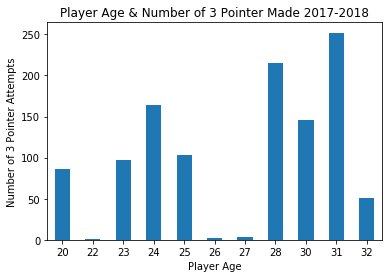

In [201]:
# Age:
# Player age and Number of Three Pointers Attempted
new_df.groupby(['Age'])
age_df = new_df.groupby(['Age'])
vals = age_df['3P'].sum()
vals.plot.bar(x=age_df.count().index, y=['3PA'], rot=0)
# Tell matplotlib where we would like to place each of our x axis headers
x_axis = np.arange(len(age_df['Age']))
# Give our chart some labels and a tile
plt.title("Player Age & Number of 3 Pointer Made 2017-2018")
plt.xlabel("Player Age")
plt.ylabel("Number of 3 Pointer Attempts")
plt.savefig("Player Age & Number of 3 Pointer Made 2017-2018")


In [202]:
players_name_group.count()

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested
Name,,,,,,,,,,,,
Alfonzo Mckinnie,82,14,82,82,82,82,82,82,14,14,7,82
Bruno Cabaclo,54,2,54,54,54,54,54,54,2,2,1,54
CJ Miles,92,80,92,92,92,92,92,92,80,80,80,92
Delon Wright,92,79,92,92,92,92,92,92,79,79,71,92
Demar Derozan,92,90,92,92,92,92,92,92,90,90,83,92
Fred Vanvleet,92,82,92,92,92,92,92,92,82,82,78,92
Jakob Poltl,92,91,92,92,92,92,92,92,91,91,3,92
Jonas Valanciunas,92,87,92,92,92,92,92,92,87,87,51,92
Kyle Lowry,92,88,92,92,92,92,92,92,88,88,88,92


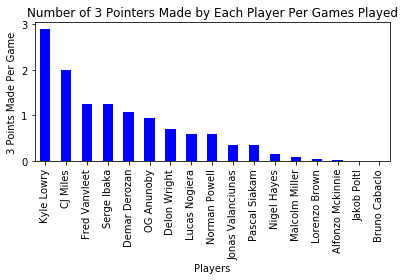

In [170]:
# Finding the number of 3 pointers made by each players per games played
threes_per_player_df = pd.DataFrame({"3 Points Made": players_name_group.sum()['3P'],
                                     "3 Points Attempted": players_name_group.sum()['3PA'],
                                 "Number of Games Played": players_name_group.count()['Rk']})
threes_per_player_df['3 Points Made Per Game'] = threes_per_player_df['3 Points Made'] / threes_per_player_df['Number of Games Played']

threes_per_players_sorted = threes_per_player_df.sort_values('3 Points Made Per Game', ascending = False)
threes_per_players_sorted['3 Points Made Per Game'].plot.bar(color='blue')
plt.xlabel("Players")
plt.ylabel("3 Points Made Per Game")
plt.title("Number of 3 Pointers Made by Each Player Per Games Played")
plt.tight_layout()
plt.savefig('Number 3 Pointers Made by Each Player Per Games Played.png')

In [250]:
# Print out the samples we want to look for. These players were either not on the Raptors roster in the 2016-2017 season 
# or was only on the roster for part of the season
print(players_group_df.loc['CJ Miles','3P'])
print(players_group_df.loc['Serge Ibaka','3P'])
print(players_group_df.loc['OG Anunoby', '3P'])

183.0
116.0
86.0


1121.0

In [288]:
population = []
for x in players_group_df['3P']:
    population.append(x)

sample = [183, 116, 86]
population_mean = sum(population)/len(population)
stats.ttest_1samp(sample, population_mean)
    

Ttest_1sampResult(statistic=2.176029307403218, pvalue=0.16152020507547502)

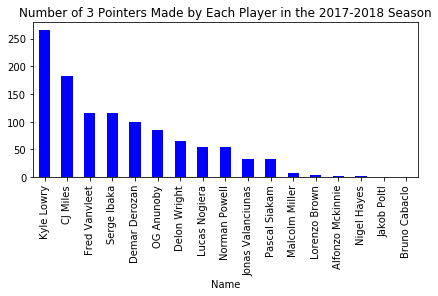

In [196]:
# understand how individual players impact the number of 3 pointers made and attempted
# which players scored fans the most free fries?
# show in a bar chart
players_group = new_df.groupby('Name').sum()
players_group_df = players_group.sort_values("3P", ascending = False)
players_group_df
players_group_df['3P'].plot.bar(color = 'blue');
plt.tight_layout()
plt.title("Number of 3 Pointers Made by Each Player in the 2017-2018 Season")
plt.savefig("Number of 3 Pointers Made by Each Player in the 2017-2018 Season.png")

In [176]:
players_group['3P%'] = players_group['3P'] *100/(players_group['3P'].sum())
players_group

,Rk,G,Age,3P,3PA,3P%
Name,,,,,,
Alfonzo Mckinnie,3403,105.0,2050,3.0,9.0,0.267618
Bruno Cabaclo,1485,3.0,1188,0.0,2.0,0.000000
CJ Miles,3458,2540.0,2783,183.0,499.0,16.324710
Delon Wright,3458,2470.0,2305,65.0,174.0,5.798394
Demar Derozan,3458,3295.0,2576,99.0,322.0,8.831401
Fred Vanvleet,3458,2947.0,2150,116.0,289.0,10.347904
Jakob Poltl,3458,3448.0,2024,1.0,3.0,0.089206
Jonas Valanciunas,3458,3058.0,2301,32.0,79.0,2.854594
Kyle Lowry,3458,3136.0,2871,266.0,659.0,23.728814


In [177]:
players_group2 = players_group.loc[players_group["3P%"] > 5]
players_group2

,Rk,G,Age,3P,3PA,3P%
Name,,,,,,
CJ Miles,3458,2540.0,2783,183.0,499.0,16.324710
Delon Wright,3458,2470.0,2305,65.0,174.0,5.798394
Demar Derozan,3458,3295.0,2576,99.0,322.0,8.831401
Fred Vanvleet,3458,2947.0,2150,116.0,289.0,10.347904
Kyle Lowry,3458,3136.0,2871,266.0,659.0,23.728814
OG Anunoby,3458,2830.0,1840,86.0,226.0,7.671722
Serge Ibaka,3458,2981.0,2576,116.0,321.0,10.347904


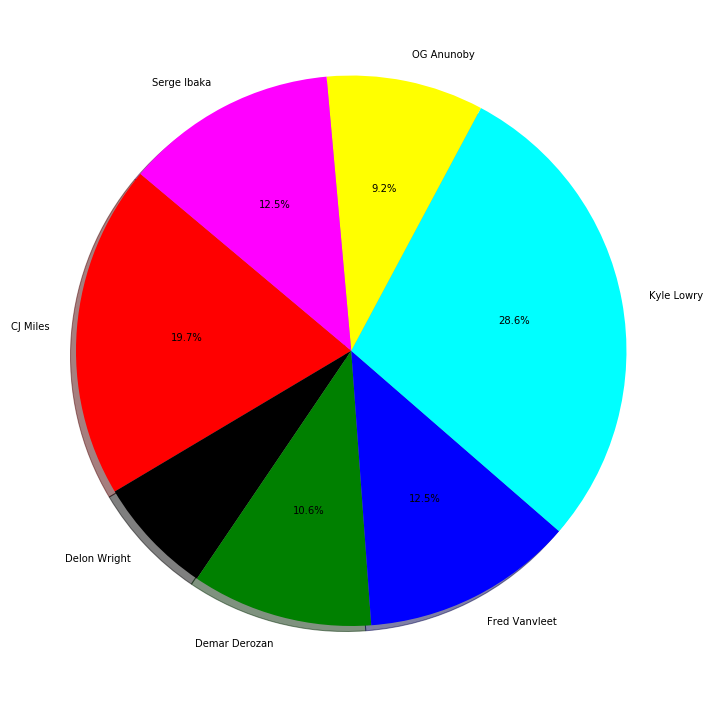

In [178]:
labels = players_group2.index
colors = ['red', 'black', 'green', 'blue', 'cyan', 'yellow', 'magenta', 'orange', 'purple', 'pink', "brown", 'gold', 'turquoise', 'maroon', 'beige', 'gray', 'lavender']
sizes = players_group2['3P%']
#fig1,ax1 = plt.subplots()
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, colors=colors, autopct = "%1.1f%%", shadow=True, startangle = 140);
plt.tight_layout()
#ax1.axis('equal')

In [179]:
# Calculate the number of games the raptors made over 12 threes 
dates_group = new_df.groupby(['Date'])

dates_group['3P'].sum() >= 12

dates_group.sum().loc[dates_group.sum()['3P'] >= 12, :]
dates_group_df = dates_group.count()
dates_group_sum = dates_group.sum()
dates_group.count()

,Rk,G,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
Date,,,,,,,,,,,,
2017-10-19,16,13,16,16,16,16,16,13,13,9,16,16
2017-10-21,16,13,16,16,16,16,16,13,13,11,16,16
2017-10-23,16,10,16,16,16,16,16,10,10,9,16,16
2017-10-25,16,11,16,16,16,16,16,11,11,8,16,16
2017-10-27,16,11,16,16,16,16,16,11,11,10,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-27,13,10,13,13,13,13,13,10,10,7,13,13
2018-05-01,13,10,13,13,13,13,13,10,10,9,13,13
2018-05-03,13,13,13,13,13,13,13,13,13,11,13,13


In [180]:
# number of times the raptors made over 12 threes
numberof3s_scored = dates_group_sum.loc[dates_group_sum['3P'] >= 12, '3P'].count()
print(f' The Raptors made over 12 threes in the 2017-2018 season {numberof3s_scored} times.')

 The Raptors made over 12 threes in the 2017-2018 season 53 times.


In [181]:
# average 3 points percentages per game
average_3pm_total = dates_group.sum()['3P']/dates_group.sum()['3PA'] *100
average_3pm_total.mean()

35.60746749055376

In [182]:
dates_group.sum()['3P'].mean()

12.184782608695652

In [183]:
dates_group.sum()['3PA'].mean()

34.18478260869565

In [184]:
average_3pm_total.sum() / len(average_3pm_total)

35.60746749055375

In [185]:
new_df['Home vs Away'].unique()
demar_df[['Date', 'Home vs Away']]
demar_df['Home vs Away'].unique()


array(['Home', 'Away'], dtype=object)

In [214]:
homeaway_3PM_group.sum()

,3 Points Made
Home vs Away,
Away,540.0
Home,581.0


Text(0.5, 1.0, 'Game Types vs Average 3 Points Made')

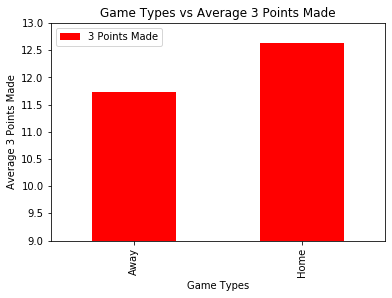

In [263]:
# Find out how many threes are made in 
homeaway_3PM = pd.DataFrame({
                            "Home vs Away": demar_df['Home vs Away'],
                            "3 Points Made": dates_group.sum()['3P'].values})
homeaway_3PM_group = homeaway_3PM.groupby(['Home vs Away'])

homeaway_3PM_group.mean().plot.bar(color = 'r')

plt.xlabel("Game Types")
plt.ylabel("Average 3 Points Made")
plt.ylim(9,13)
plt.title("Game Types vs Average 3 Points Made")


In [217]:
homeaway_3PM_group.sum()

,3 Points Made
Home vs Away,
Away,540.0
Home,581.0


In [262]:
average_3pm_total

Date
2017-10-19    45.714286
2017-10-21    29.545455
2017-10-23    25.641026
2017-10-25    22.857143
2017-10-27    21.875000
                ...    
2018-04-27    28.000000
2018-05-01    32.142857
2018-05-03    38.709677
2018-05-05    39.393939
2018-05-07    25.000000
Length: 92, dtype: float64

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


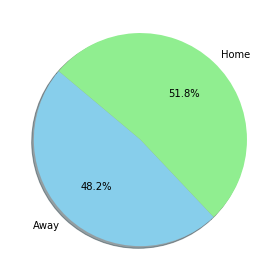

In [223]:
# Pie Chart for Game Types vs Average 3 points made
homeaway_3PM_label = ['Away', 'Home']
homeaway_3PM_color = ['skyblue', 'lightgreen']
homeaway_3PM_sizes = homeaway_3PM_group.sum()
plt.pie(homeaway_3PM_sizes, labels = homeaway_3PM_label, colors = homeaway_3PM_color, autopct="%1.1f%%", shadow=True, startangle=140);

plt.tight_layout()


Text(0.5, 1.0, 'Game Types vs Average 3 Points Percentages')

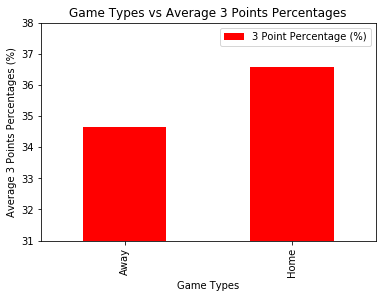

In [230]:
# Find out the 3 point percentages in Home and Away games 
homeaway_3PPercent = pd.DataFrame({"Home vs Away": demar_df['Home vs Away'],
                                  "3 Point Percentage (%)": average_3pm_total.values})
homeaway_3PPercent_group = homeaway_3PPercent.groupby(['Home vs Away'])
homeaway_average_3PPercent = homeaway_3PPercent_group.mean()
homeaway_average_3PPercent.plot.bar(color='r')
# chart labels
plt.xlabel("Game Types")
plt.ylabel("Average 3 Points Percentages (%)")
plt.ylim(31,38)
plt.title("Game Types vs Average 3 Points Percentages")

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


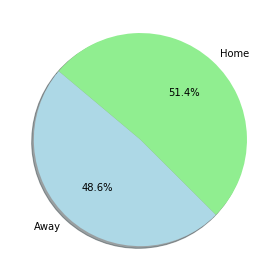

In [232]:
homeaway_3PPercent_label = ['Away', 'Home']
homeaway_3PPercent_color = ['lightblue','lightgreen']
homeaway_3PPercent_sizes = homeaway_3PPercent_group.sum()
plt.pie(homeaway_3PPercent_sizes, labels=homeaway_3PPercent_label, colors=homeaway_3PPercent_color, autopct="%1.1f%%", shadow=True, startangle=140)
plt.tight_layout()

In [188]:
timerested_group.count()
timerested_group_count = timerested_group.count().drop(['N/A'])
timerested_group_count['3P']

Time Rested
1.0    162
2.0    641
3.0    176
4.0     59
6+      10
Name: 3P, dtype: int64

In [189]:
timerested_mean

Time Rested
1.0    1.086420
2.0    1.029641
3.0    1.130682
4.0    1.033898
6+     0.900000
Name: 3P, dtype: float64

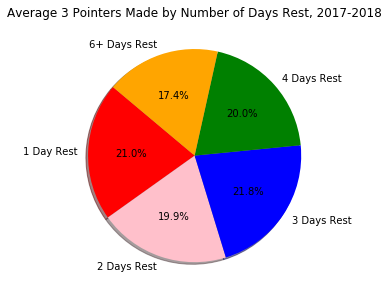

In [198]:
timerested_group = new_df.groupby(['Time Rested'])
timerested_mean = timerested_group['3P'].mean().drop(['N/A'])

labels = ['1 Day Rest', '2 Days Rest', '3 Days Rest', '4 Days Rest', '6+ Days Rest']
colors = ['red', 'pink', 'blue', 'green', 'orange']
plt.pie(timerested_mean, labels = labels, colors = colors, autopct = '%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()
plt.title("Average 3 Pointers Made by Number of Days Rest, 2017-2018")
plt.savefig("Average 3 Pointers Made by Number of Days Rest, 2017-2018")

In [191]:
timerested_group.count()

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Name
Time Rested,,,,,,,,,,,,
1.0,221,162,221,221,221,221,221,221,162,162,132,221
2.0,872,641,872,872,872,872,872,872,641,641,508,872
3.0,225,176,225,225,225,225,225,225,176,176,139,225
4.0,76,59,76,76,76,76,76,76,59,59,50,76
6+,15,10,15,15,15,15,15,15,10,10,7,15
N/A,17,13,17,17,17,17,17,17,13,13,9,17


In [192]:
one_day_rested_df = pd.DataFrame({"Rested": "1 Day Rest",
                              "3 Points Made": one_day_rested })


two_days_rested_df = pd.DataFrame({"Rested": "2 Days Rest",
                                  "3 Points Made": two_days_rested})
three_days_rested_df = pd.DataFrame({"Rested": "3 Days Rest",
                                  "3 Points Made": three_days_rested})
four_days_rested_df = pd.DataFrame({"Rested": "4 Days Rest",
                                  "3 Points Made": four_days_rested})
five_days_rested_df = pd.DataFrame({"Rested": "5+ Days Rest",
                                  "3 Points Made": five_days_rested})

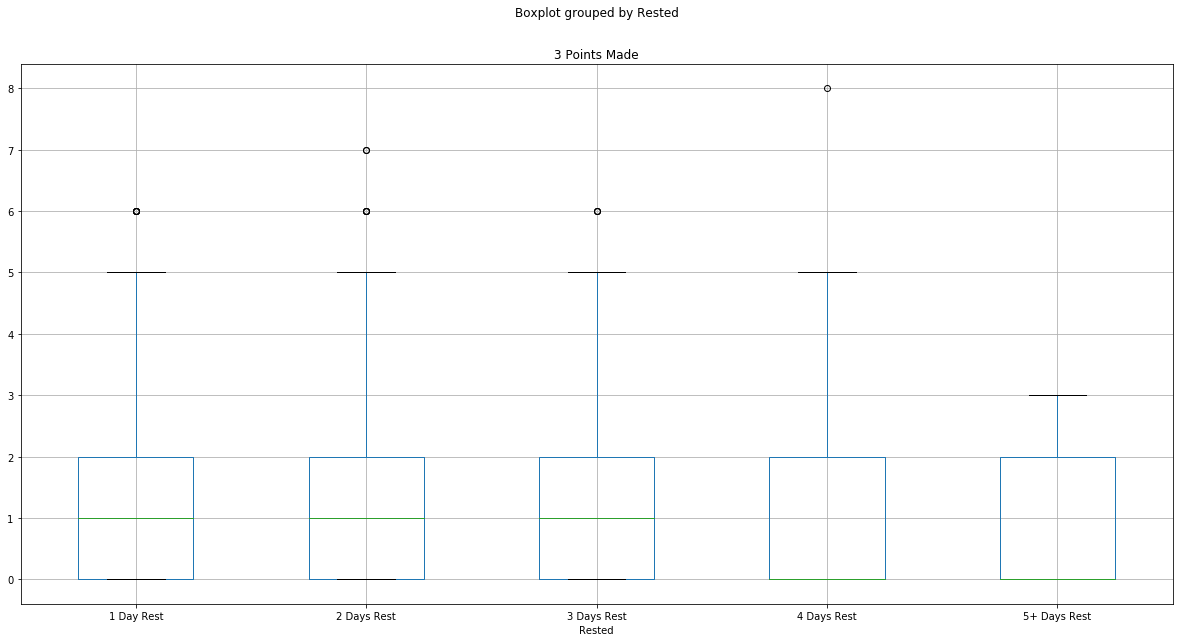

In [112]:
# Create a list that contains data sorted by number of days days rested
one_day_rested = new_df.loc[new_df['Time Rested'] ==1, '3P']
two_days_rested = new_df.loc[new_df['Time Rested'] == 2, '3P']
two_days_rested
three_days_rested = new_df.loc[new_df['Time Rested'] == 3, '3P']
four_days_rested = new_df.loc[new_df['Time Rested'] == 4, '3P']
five_days_rested = new_df.loc[new_df['Time Rested'] == "6+", '3P']

days_rested_list = [one_day_rested_df, two_days_rested_df, three_days_rested_df, four_days_rested_df, five_days_rested_df]
days_rested_list_df = pd.concat(days_rested_list)

# Create a boxplot to compare means
days_rested_list_df.boxplot("3 Points Made", by="Rested", figsize=(20,10))

In [58]:
#Quartile calculations 
quartiles = timerested_mean.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
median = [0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq

In [59]:
# Identify outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f'Values below {lower_bound} could be outliers.')
print(f'Values above {upper_bound} could be outliers.')


values below 0.9444733344889352 could be outliers.
Values above 1.1715876042449103 could be outliers.


In [61]:
timerested_mean

Time Rested
1.0    1.086420
2.0    1.029641
3.0    1.130682
4.0    1.033898
6+     0.900000
Name: 3P, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbf2ce1dc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbf2cf9988>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbf2cf6808>],
 'medians': [<matplotlib.lines.Line2D at 0x1bbf2cf9d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bbf2d01a48>],
 'means': []}

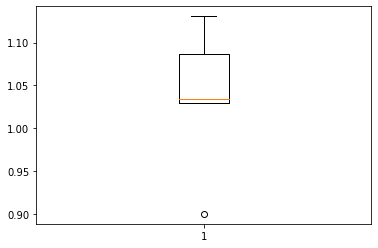

In [60]:
# Generate box plots 
fig1,ax1 = plt.subplots()
ax1.boxplot(timerested_mean)

In [296]:
BCE_bought = 46.09 * 150
BCE_sell = 48.45 * 150
print(BCE_bought)
print(BCE_sell)
print(BCE_sell - BCE_bought)

6913.500000000001
7267.5
353.9999999999991


In [294]:
rbc_bought = 72.67 * 95
rbc_sell = 77.42 * 95
print(rbc_bought)
print(rbc_sell)
print(rbc_sell-rbc_bought)

6903.650000000001
7354.900000000001
451.25


766.4499999999998

In [ ]:
demar['Name'] = "Demar Derozan"
klo['Name'] = "Kyle Lowry"
anunoby['Name'] = "OG Anunoby"
demar_threepoint = demar[['Date', '3P', '3PA', '3P%']]
demar_threepoint
klo_threepoint = klo[['Date', '3P', '3PA', '3P%']]
anunoby_threepoint = anunoby[['Date', "3P", '3PA', '3P%']]

In [ ]:
demar_kyle = pd.merge(demar_threepoint, klo_threepoint, on = "Date", suffixes = ("_Demar", "_Kyle"))

In [ ]:
pd.merge(demar_kyle, anunoby_threepoint, on="Date", suffixes=("","Anunoby"))

In [ ]:
number_daysrested_1617 = pd.read_csv("NumberDaysRested/Reg_Number_Days_Off_2016-2017.csv")
number_daysrested_1718 = pd.read_csv("NumberDaysRested/Reg_Number_Days_Off_2017-2018.csv")

In [ ]:
threepoints_1617 = number_daysrested_1617 [["DAYS REST","3PM","3PA"]]

In [ ]:
threepoints_1718 = number_daysrested_1718[["DAYS REST",'3PM','3PA']]
threepoints_1718

In [ ]:
pd.merge(threepoints_1617, threepoints_1718, on = 'DAYS REST', suffixes = ("_16-17", "_17-18"))


In [ ]:
threepoints_1617['3PM']

In [ ]:
plt.scatter(threepoints_1617['3PA'],threepoints_1617['3PM'], marker='o')

In [ ]:
threepoints_1617

In [ ]:
colors = ['b', 'c', 'y', 'm', 'r', 'purple']
a = plt.scatter(threepoints_1617['3PM'],threepoints_1617['3PA'], marker='o', color = colors[0])


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(threepoints_1617['3PM'],threepoints_1617['3PA'])
lin_regress = slope*threepoints_1617['3PM'] + intercept
line_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(threepoints_1617['3PM'], lin_regress, color = 'r')

plt.annotate(line_equation, (4,22), color = 'r')

plt.grid()

In [ ]:

colors = ['b', 'c', 'y', 'm', 'r', 'purple']
a = plt.scatter(threepoints_1617['3PM'][0],threepoints_1617['3PA'][0], marker='o', color = colors[0])
b = plt.scatter(threepoints_1617['3PM'][1],threepoints_1617['3PA'][1], marker='o', color = colors[1])
c = plt.scatter(threepoints_1617['3PM'][2],threepoints_1617['3PA'][2], marker='o', color = colors[2])
d = plt.scatter(threepoints_1617['3PM'][3],threepoints_1617['3PA'][3], marker='o', color = colors[3])
e = plt.scatter(threepoints_1617['3PM'][4],threepoints_1617['3PA'][4], marker='o', color = colors[4])
f = plt.scatter(threepoints_1617['3PM'][5],threepoints_1617['3PA'][5], marker='o', color = colors[5])

plt.legend((a,b,c,d,e,f),
           ('0 Days Rest', '1 Day Rest', '2 Days Rest', '3 Days Rest', '5 Days Rest', '6+ Days Rest'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlabel("3 Points Made")
plt.ylabel("3 Points Attempted")
plt.title("3PM vs 3PA for the 2016-2017 Season")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(threepoints_1617['3PM'],threepoints_1617['3PA'])
lin_regress = slope*threepoints_1617['3PM'] + intercept
line_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(threepoints_1617['3PM'], lin_regress, color = 'r')

plt.annotate(line_equation, (4,22), color = 'r')

plt.grid()


In [ ]:
x_axis = [1,2,3,4,5,6]
plt.bar(threepoints_1617['3PM'], threepoints_1617['3PA'], )